In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/sign-language-digits-dataset/Y.npy
/kaggle/input/sign-language-digits-dataset/X.npy
/kaggle/input/sign-language-digits-dataset/Sign-language-digits-dataset/Y.npy
/kaggle/input/sign-language-digits-dataset/Sign-language-digits-dataset/X.npy


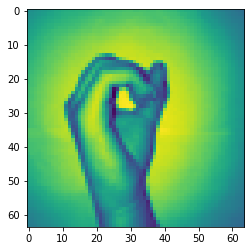

In [2]:
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

x_l = np.load('/kaggle/input/sign-language-digits-dataset/X.npy')
y_l = np.load('/kaggle/input/sign-language-digits-dataset/Y.npy')
plt.imshow(x_l[208].reshape(64,64))

In [3]:
X = np.concatenate((x_l[204:409],x_l[822:1027]),axis=0)
ones = np.ones((205,1))
zeros = np.zeros((205,1))
Y = np.concatenate((zeros,ones),axis=0)
print(X.shape)
print(Y.shape)

(410, 64, 64)
(410, 1)


In [4]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.15,random_state=42 )
x_train = X_train.reshape(X_train.shape[0],-1)
x_test = X_test.reshape(X_test.shape[0],-1)
print(x_train.shape,x_test.shape,Y_train.shape,Y_test.shape)

(348, 4096) (62, 4096) (348, 1) (62, 1)


Epoch 1/100
11/11 [==============================] - 0s 23ms/step - loss: 0.5155 - accuracy: 0.7443 - val_loss: 0.7096 - val_accuracy: 0.5323
Epoch 2/100
11/11 [==============================] - 0s 5ms/step - loss: 0.3449 - accuracy: 0.8621 - val_loss: 0.6860 - val_accuracy: 0.5323
Epoch 3/100
11/11 [==============================] - 0s 5ms/step - loss: 0.2673 - accuracy: 0.9167 - val_loss: 0.6766 - val_accuracy: 0.5000
Epoch 4/100
11/11 [==============================] - 0s 5ms/step - loss: 0.2431 - accuracy: 0.9195 - val_loss: 0.6746 - val_accuracy: 0.5323
Epoch 5/100
11/11 [==============================] - 0s 5ms/step - loss: 0.1956 - accuracy: 0.9339 - val_loss: 0.6771 - val_accuracy: 0.5484
Epoch 6/100
11/11 [==============================] - 0s 5ms/step - loss: 0.1954 - accuracy: 0.9397 - val_loss: 0.5878 - val_accuracy: 0.6935
Epoch 7/100
11/11 [==============================] - 0s 4ms/step - loss: 0.1843 - accuracy: 0.9397 - val_loss: 0.5375 - val_accuracy: 0.6935
Epoch 8/100


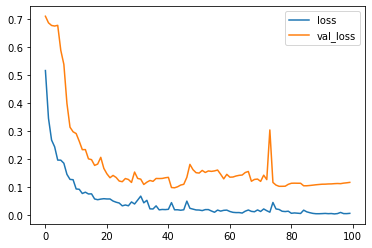

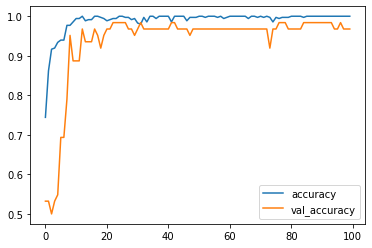

In [5]:
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras import layers
model = Sequential([
    layers.BatchNormalization(input_dim = x_train.shape[1]),
    layers.Dense(units=8,activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(units=4,activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(units=1,activation='sigmoid')
])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
ANN = model.fit(x_train,Y_train,validation_data = (x_test,Y_test),batch_size=32,epochs=100)

history = pd.DataFrame(ANN.history)
history.loc[0:,['loss','val_loss']].plot()
history.loc[0:,['accuracy','val_accuracy']].plot()
print('train_accuracy:',max(history.loc[0:,'accuracy']))
print('test_accuracy:',max(history.loc[0:,'val_accuracy']))

In [6]:
model.evaluate(x_test,Y_test)

2/2 [==============================] - 0s 2ms/step - loss: 0.1160 - accuracy: 0.9677


[0.11600835621356964, 0.9677419066429138]

sign shown is 1


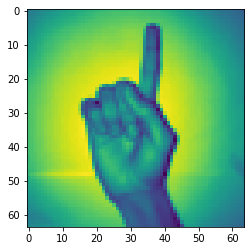

In [7]:
plt.imshow(x_test[47].reshape(64,64))  #change index to view image
predictions = model.predict(x_test) 
if predictions[47]>0.5 :              #change index to view prediction for above selected image
    print('sign shown is 1') 
else :
    print('sign shown is 0')